In [343]:
# Math library
import numpy as np
import math
# Plotting library
import matplotlib.pyplot as plt

In [344]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [345]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO (done):  Replace this line with the linear regression model (eq 2.4)
  y = phi0+phi1*x

  return y

In [346]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, ')
    ax.set_ylabel('Output, ')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

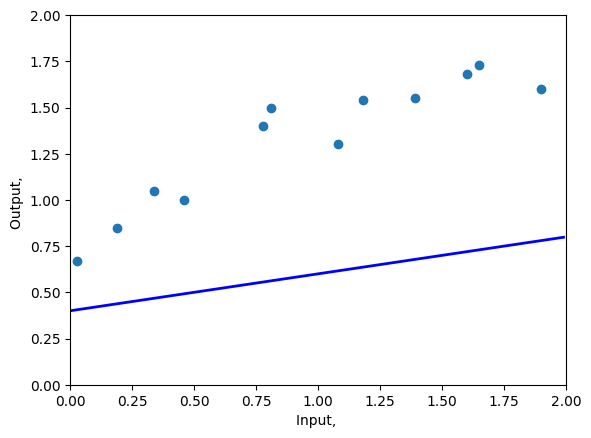

In [347]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [348]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):
  return (phi0+phi1*x-y)*(phi0+phi1*x-y)

  loss = []
  # TODO Replace this line with the loss calculation (equation 2.5)
  for i in range(len(y)):
    loss.append((phi0+phi1*x[i]-y[i])*(phi0+phi1*x[i]-y[i]))

  return loss

In [349]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss}, Ground truth =7.07')

Your Loss = [0.069696 0.169744 0.338724 0.258064 0.712336 0.879844 0.467856 0.817216
 0.760384 0.9216   1.       0.6724  ], Ground truth =7.07


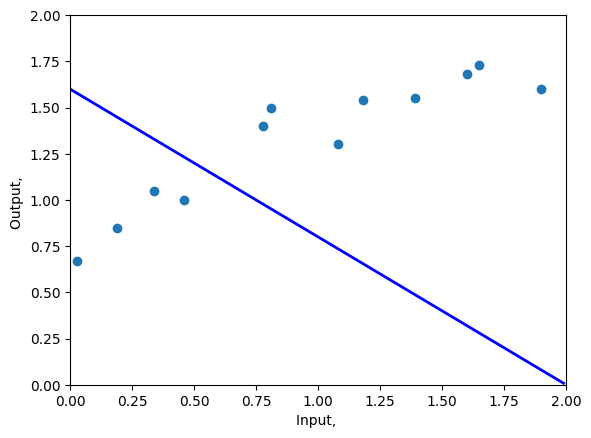

[0.820836 0.357604 0.077284 0.053824 0.179776 0.300304 0.318096 0.781456
 1.127844 1.8496   2.1025   2.3104  ]
Your Loss = [0.820836 0.357604 0.077284 0.053824 0.179776 0.300304 0.318096 0.781456
 1.127844 1.8496   2.1025   2.3104  ], Ground truth =10.28


In [350]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(loss)
print(f'Your Loss = {loss}, Ground truth =10.28')

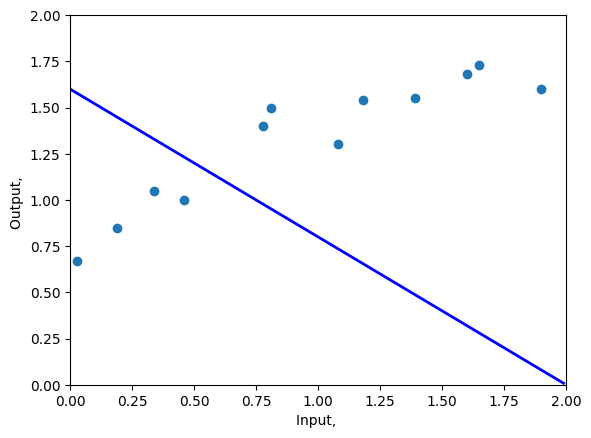

Your Loss = [0.820836 0.357604 0.077284 0.053824 0.179776 0.300304 0.318096 0.781456
 1.127844 1.8496   2.1025   2.3104  ]


In [351]:
# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 1.60 ; phi1 =-0.8

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1)}')

In [352]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    z = phi0_mesh[indices]
    w = phi1_mesh[indices]
    all_losses[indices] =  math.fsum(compute_loss(x,y, z, w))

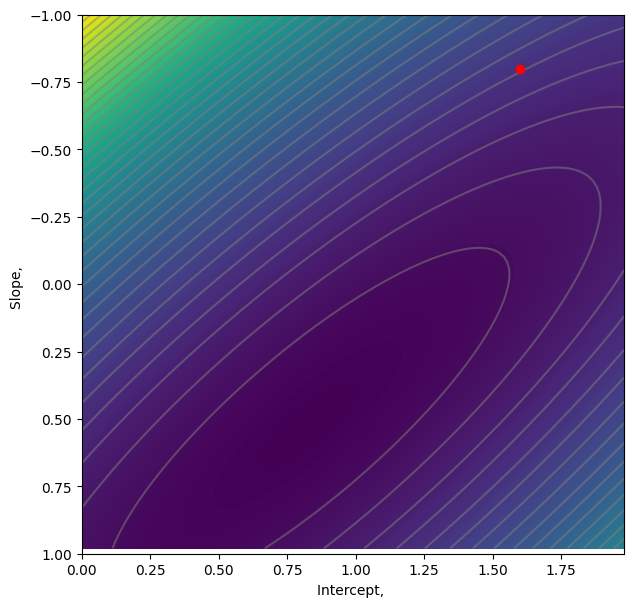

In [353]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, ')
ax.set_ylabel(r'Slope, ')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()